# Simple Linear Regression

## Fuel Consumption Ratings

Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Columns:

- MODELYEAR e.g. 2018
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [2]:
col_num = range(13)
df = pd.read_csv('2018 Fuel Consumption Ratings.csv', encoding='latin1', header=1, usecols=col_num)
df.columns = ['year', 'make', 'model', 'vehicle_class', 
           'engine_size', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city', 
           'fuel_consumption_hwy', 'fuel_consumption_comb', 'fuel_consumption_mpg', 'co2_emissions']
df.head()

,year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_mpg,co2_emissions
0,2018,ACURA,ILX,COMPACT,2.4,4.0,AM8,Z,9.4,6.8,8.2,34.0,192.0
1,2018,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6.0,AS9,Z,12.6,9.0,11.0,26.0,259.0
2,2018,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6.0,AS9,Z,12.2,9.0,10.7,26.0,251.0
3,2018,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6.0,AM7,Z,9.1,9.0,9.0,31.0,210.0
4,2018,ACURA,NSX,TWO-SEATER,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,261.0


In [3]:
df.dropna(inplace=True)

In [4]:
df.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_mpg,co2_emissions
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,3.112188,5.596491,12.361865,8.991782,10.845983,27.654663,250.036934
std,1.328216,1.832815,3.264331,2.053971,2.685583,7.126585,56.065766
min,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000
25%,2.000000,4.000000,10.100000,7.600000,9.000000,23.000000,210.000000
50%,3.000000,6.000000,12.000000,8.700000,10.500000,27.000000,246.000000
75%,3.600000,6.000000,14.300000,10.200000,12.400000,31.000000,287.500000
max,8.000000,16.000000,26.800000,18.000000,22.200000,69.000000,522.000000


Making a data frame with few features to explore

In [5]:
cdf = df[['engine_size', 'cylinders', 'fuel_consumption_comb', 'co2_emissions']]
cdf.head(8)

,engine_size,cylinders,fuel_consumption_comb,co2_emissions
0,2.4,4.0,8.2,192.0
1,3.5,6.0,11.0,259.0
2,3.5,6.0,10.7,251.0
3,3.0,6.0,9.0,210.0
4,3.5,6.0,11.0,261.0
5,3.5,6.0,10.7,250.0
6,3.5,6.0,8.4,196.0
7,2.4,4.0,8.7,205.0


Plotting each of these features

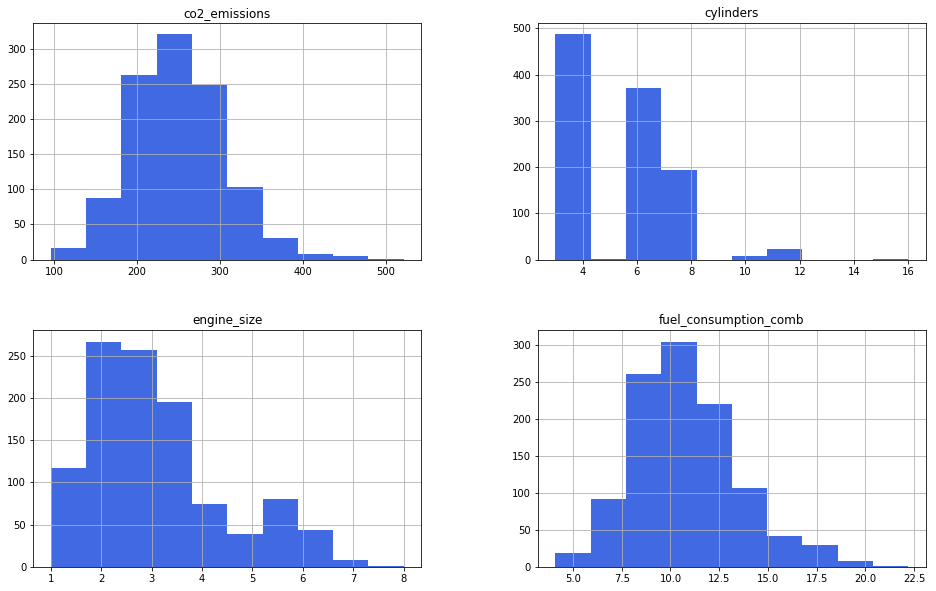

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

viz = cdf[['engine_size', 'cylinders', 'fuel_consumption_comb', 'co2_emissions']]
viz.hist(color='royalblue')
plt.show();

Now plotting each of these features vs the Emission, to see how linear is their relation

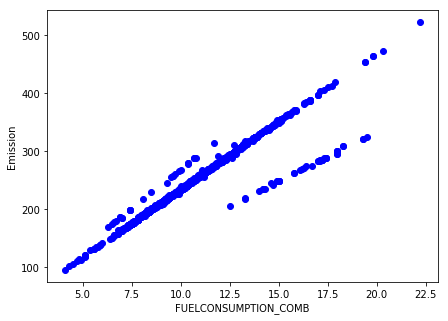

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(cdf.fuel_consumption_comb, cdf.co2_emissions,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

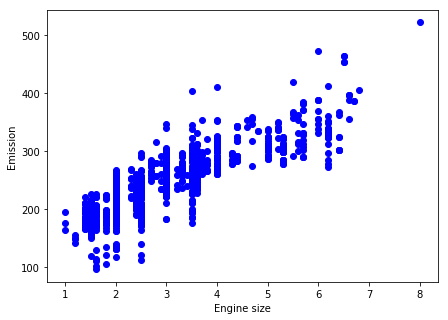

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(cdf.engine_size, cdf.co2_emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

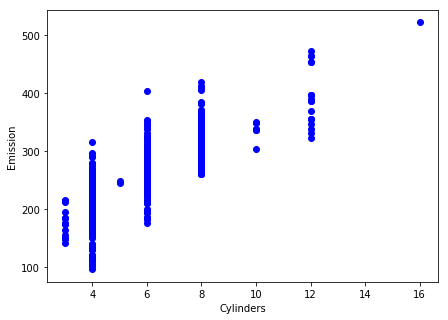

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(cdf.cylinders, cdf.co2_emissions,  color='blue')
plt.xlabel('Cylinders')
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['engine_size']])
train_y = np.asanyarray(train[['co2_emissions']])

regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[35.41759596]]
Intercept:  [139.42196888]


### Plot outputs

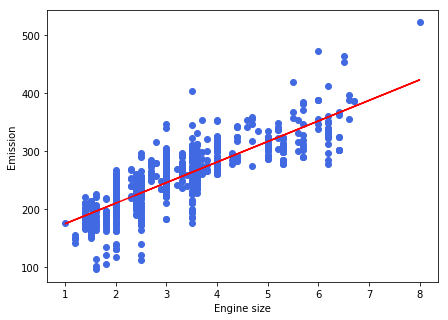

In [12]:
y = regr.coef_[0][0]*train_x + regr.intercept_[0]

plt.figure(figsize=(7,5))
plt.scatter(train.engine_size, train.co2_emissions,  color='royalblue')
plt.plot(train_x, y, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission");

### Evaluation

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['engine_size']])
test_y = np.asanyarray(test[['co2_emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.24
Residual sum of squares (MSE): 812.77
R2-score: 0.65
